In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def excentricidade(M):
    dv_mu20 = M['mu20'] / M['m00']
    dv_mu02 = M['mu02'] / M['m00']
    dv_mu11 = M['mu11'] / M['m00']

    a = dv_mu20 + dv_mu02

    b = np.sqrt(4*(dv_mu11**2) + (dv_mu20 - dv_mu02)**2)

    return np.sqrt(1 - ((a - b) / (a + b)))

In [3]:
def solidez(contorno):
    area = cv2.contourArea(contorno)
    casco = cv2.convexHull(contorno)
    casco_area = cv2.contourArea(casco)
    return float(area) / float(casco_area)

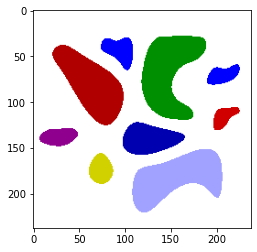

In [4]:
img = cv2.imread("img1.png")

plt.imshow(img)

img = cv2.imread("img1.png", 0)

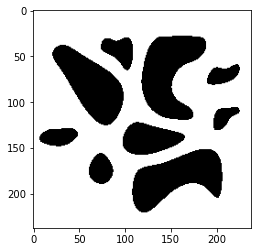

In [5]:
limite = 250
img_mono = cv2.threshold(img, limite, 255, cv2.THRESH_BINARY)[1]

plt.imshow(img_mono, cmap="gray")

plt.show()

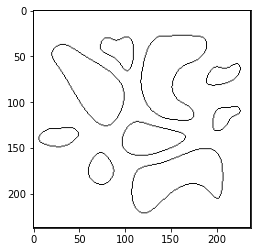

In [6]:
img_contorno = np.ones(img_mono.shape, np.uint8)*255
contornos, _ = cv2.findContours(img_mono, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_contorno, contornos, -1, 0)
plt.imshow(img_contorno, cmap="gray")

plt.show()

In [7]:
qtd_contornos = len(contornos)-1

print("número de regiões: " + str(qtd_contornos))

número de regiões: 9


região 0:  área: 4107  perímetro: 319.421354  excentricidade: 0.813036  solidez: 0.754963
região 1:  área: 843  perímetro: 125.639609  excentricidade: 0.735146  solidez: 0.904558
região 2:  área: 3690  perímetro: 265.119838  excentricidade: 0.896234  solidez: 0.978264
região 3:  área: 584  perímetro: 104.911687  excentricidade: 0.882918  solidez: 0.913928
região 4:  área: 478  perímetro: 94.426406  excentricidade: 0.850570  solidez: 0.925460
região 5:  área: 1761  perímetro: 179.781745  excentricidade: 0.864278  solidez: 0.971862
região 6:  área: 688  perímetro: 108.669047  excentricidade: 0.882704  solidez: 0.972458
região 7:  área: 4067  perímetro: 311.078208  excentricidade: 0.908225  solidez: 0.780689
região 8:  área: 716  perímetro: 101.982755  excentricidade: 0.610530  solidez: 0.980164


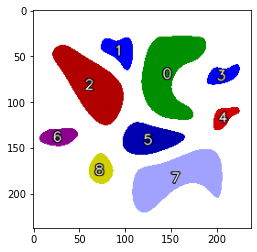

In [8]:
regiao_pequena = regiao_media = regiao_grande = 0
lista_areas = []
img_regioes = cv2.imread("img1.png")

for regiao, c in enumerate(reversed(contornos[1:])):

    M = cv2.moments(c)

    area = M['m00']
    lista_areas.append(area)
    perimetro = cv2.arcLength(c,True)
    excen = excentricidade(M)
    solid = solidez(c)

    print("região %d:  área: %d  perímetro: %.6f  excentricidade: %.6f  solidez: %.6f"
        %(regiao, area, perimetro, excen, solid))

    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.putText(img_regioes, str(regiao), (cX-6, cY+6), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 0), lineType=cv2.LINE_AA, thickness=2)

    cv2.putText(img_regioes, str(regiao), (cX-6, cY+6), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), lineType=cv2.LINE_AA, thickness=1)

    if (area<1500):
        regiao_pequena += 1
    elif(area<3000):
        regiao_media += 1
    else:
        regiao_grande += 1

plt.imshow(img_regioes)

plt.show()

número de regiões pequenas: 5
número de regiões médias: 1
número de regiões grandes: 3


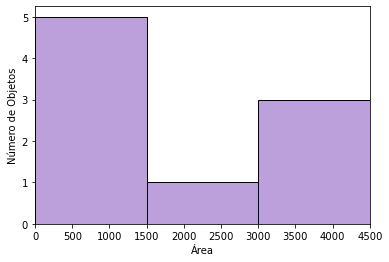

In [9]:
print("número de regiões pequenas: " + str(regiao_pequena))
print("número de regiões médias: " + str(regiao_media))
print("número de regiões grandes: " + str(regiao_grande))

plt.hist(lista_areas, bins=[0, 1500, 3000, 4500], edgecolor='black', color="#BCA0DC")
plt.xlim([0, 4500])
plt.ylabel('Número de Objetos')
plt.xlabel('Área')

plt.show()

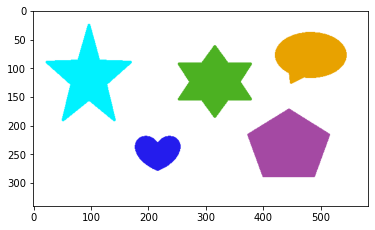

In [10]:
img = cv2.imread("img2.png")

plt.imshow(img)

img = cv2.imread("img2.png", 0)

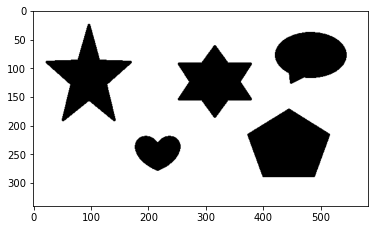

In [11]:
limite = 250
img_mono = cv2.threshold(img, limite, 255, cv2.THRESH_BINARY)[1]

plt.imshow(img_mono, cmap="gray")

plt.show()

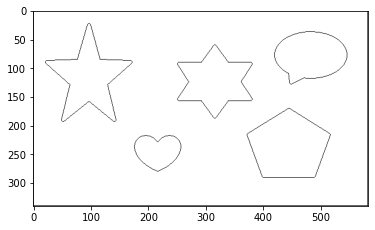

In [12]:
img_contorno = np.ones(img_mono.shape, np.uint8)*255
contornos, _ = cv2.findContours(img_mono, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_contorno, contornos, -1, 0)
plt.imshow(img_contorno, cmap="gray")

plt.show()

In [13]:
qtd_contornos = len(contornos)-1

print("número de regiões: " + str(qtd_contornos))

número de regiões: 5


região 0:  área: 9906  perímetro: 640.198047  excentricidade: 0.549698  solidez: 0.554862
região 1:  área: 8228  perímetro: 363.948267  excentricidade: 0.743057  solidez: 0.962735
região 2:  área: 9029  perímetro: 490.073153  excentricidade: 0.526839  solidez: 0.719901
região 3:  área: 12223  perímetro: 444.475177  excentricidade: 0.500404  solidez: 0.989677
região 4:  área: 3628  perímetro: 245.906636  excentricidade: 0.690510  solidez: 0.948869


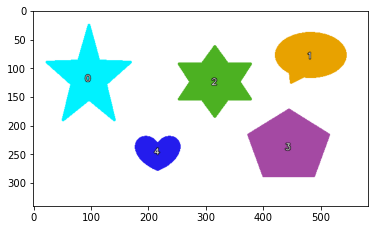

In [14]:
regiao_pequena = regiao_media = regiao_grande = 0
lista_areas = []
img_regioes = cv2.imread("img2.png")

for regiao, c in enumerate(reversed(contornos[1:])):

    M = cv2.moments(c)

    area = M['m00']
    lista_areas.append(area)
    perimetro = cv2.arcLength(c,True)
    excen = excentricidade(M)
    solid = solidez(c)

    print("região %d:  área: %d  perímetro: %.6f  excentricidade: %.6f  solidez: %.6f"
        %(regiao, area, perimetro, excen, solid))

    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.putText(img_regioes, str(regiao), (cX-6, cY+6), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 0), lineType=cv2.LINE_AA, thickness=2)

    cv2.putText(img_regioes, str(regiao), (cX-6, cY+6), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), lineType=cv2.LINE_AA, thickness=1)

    if (area<1500):
        regiao_pequena += 1
    elif(area<3000):
        regiao_media += 1
    else:
        regiao_grande += 1

plt.imshow(img_regioes)

plt.show()

número de regiões pequenas: 0
número de regiões médias: 0
número de regiões grandes: 5


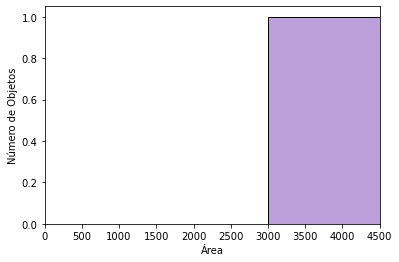

In [15]:
print("número de regiões pequenas: " + str(regiao_pequena))
print("número de regiões médias: " + str(regiao_media))
print("número de regiões grandes: " + str(regiao_grande))

plt.hist(lista_areas, bins=[0, 1500, 3000, 4500], edgecolor='black', color="#BCA0DC")
plt.xlim([0, 4500])
plt.ylabel('Número de Objetos')
plt.xlabel('Área')

plt.show()